

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>




# Vamos encher o carrinho!

# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos a você foi modificado do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa concluir três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos intermédios a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar os dados e fazer a AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva seu plano:

Precisamos importar as tabelas necessárias para fazer a análise dos dados, ou seja, a biblioteca pandas e a biblioteca matplotlib (dela importamos apenas o pyplot, que faz os gráficos). Depois precisamos definir os dataframes, no nosso caso são 5, são eles `instacart_orders`, `products`, `order_products`, `aisles` e `departments`. Após a leitura, precisamos imprimir as informações de cada dataframe, para isso utilizamos a função `info()` e a função `describe()` em cada dataframe. E para saber as 5 primeiras linhas de cada dataframe foi aplicada a função `head()`.

In [1]:
# Importe as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# leia os conjuntos de dados em DataFrames
df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ';')
df_products = pd.read_csv('/datasets/products.csv', sep = ';')
df_order_products = pd.read_csv('/datasets/order_products.csv', sep = ';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep = ';')
df_departments = pd.read_csv('/datasets/departments.csv', sep = ';')

In [3]:
# imprima as informações sobre o DataFrame
df_instacart_orders.info()
df_instacart_orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [4]:
display(df_instacart_orders)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [5]:
# imprima as informações sobre o DataFrame
df_products.info()
df_products.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


In [6]:
display(df_products)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [7]:
# imprima as informações sobre o DataFrame
df_order_products.info(show_counts = True)
df_order_products.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


In [8]:
display(df_order_products)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [9]:
# imprima as informações sobre o DataFrame
df_aisles.info()
df_aisles.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [10]:
display(df_aisles)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [11]:
# imprima as informações sobre o DataFrame
df_departments.info()
df_departments.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


In [12]:
display(df_departments)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## Conclusões

Escreva suas conclusões aqui:

Ao chamar a função `head()` em cada um dos dataframes, notou-se que os dados estavam separados por ponto e vírgula (;). Para separar os dados, foi preciso usar o parâmetro `sep = ';'` na função de leitura `pd.read_csv()`. Após de ter arrumado os dataframes, foi utlizado a função `info()` e a função `describe()` em cada dataframe. Também foi utilizada a função `display()` para mostrar os dataframes.

No dataframe `df_instacart_orders` notamos 6 colunas, são elas `'order_id'`, `'user_id'`, `'order_number'`, `'order_dow'`, `'order_hour_of_day'` e `'days_since_prior_order'`. As colunas contém dados do tipo int64, exceto `days_since_prior_order` que contém dados do tipo float64, vai ser preciso modificar para int64 pois dias são números inteiros. A coluna `'days_since_prior_order'` contém 450148 linhas de um total de 478967. Isso indica que há 28819 linhas de dados ausentes.

No dataframe `df_products` notamos que tem 4 colunas, são elas `'product_id'`, `'product_name'`, `'aisle_id'` e `'departament_id'`. As colunas contém dados do tipo int64, exceto `'product_name'` que contém dados do tipo object. Na coluna `product_name` contém 48436 linhas de um total de 49694. Isso indica que há 1258 linhas de dados ausentes.

No dataframe `df_order_products` notamos que tem 4 colunas, são elas `'order_id'`, `'product_id'`, `'add_to_cart_order'` e `'reordered'`. As colunas contém dados do tipo int64, exceto `'add_to_cart_order'` que contém dados do tipo float64, vai ser preciso modificar para int64 pois a quantidade de produtos é um número inteiro. A coluna `'add_to_cart_order'` contém 4544171 linhas de um total de 454007. Isso indica que há 906 linhas de dados ausentes.

No dataframe `df_aisles` notamos que tem 2 colunas, são elas `'aisle_id'` e `'aisle'`. A coluna `'aisle_id'` contém dados do tipo int64, e `'aisle'` que contém dados do tipo object.

Por fim  no dataframe `df_departments` notamos que tem 2 colunas, são elas `'department_id'` e `'department'`. A coluna `'department_id'` contém dados do tipo int64, e `'department'` que contém dados do tipo object.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>



# Etapa 2

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.


## Plano de solução

Escreva seu plano:

Para detectarmos se há dados duplicados utilizamos a função `duplicated()`. Depois aplicamos em cada dataframe, caso seja necessários será feita a remoção dos dados duplicados com a função `drop_duplicates()`, garantindo que cada transação ou item seja representado apenas uma vez. Isso evita distorções nos cálculos. Os valores ausentes são detectados pela função `isna()` e a remoção deles é feita pela função `dropna()` ou pela função `fillna()`, dependendo de cada caso.

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `orders`

In [13]:
# Verifique e corrija os tipos de dados
df_instacart_orders.convert_dtypes(infer_objects = False).dtypes
df_instacart_orders['days_since_prior_order'] = df_instacart_orders['days_since_prior_order'].astype('Int64')
df_instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478967 non-null  int64
 1   user_id                 478967 non-null  int64
 2   order_number            478967 non-null  int64
 3   order_dow               478967 non-null  int64
 4   order_hour_of_day       478967 non-null  int64
 5   days_since_prior_order  450148 non-null  Int64
dtypes: Int64(1), int64(5)
memory usage: 22.4 MB


In [14]:
# Verifique se há pedidos duplicados
df_instacart_orders[df_instacart_orders.duplicated(subset='order_id', keep=False)].sort_values('order_id')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10
371905,391768,57671,19,3,2,10
119251,408114,68324,4,3,2,18
321100,408114,68324,4,3,2,18
394347,467134,63189,21,3,2,2
250626,467134,63189,21,3,2,2
99462,794638,50898,24,3,2,2
145574,794638,50898,24,3,2,2
311713,1021560,53767,3,3,2,9
242618,1021560,53767,3,3,2,9


Há linhas duplicadas? Se sim, o que elas têm em comum?

Sim, há linhas 30 duplicadas, com 15 pares de linhas. Elas tem em comum 3 colunas `'order_id'`, `'user_id'` e `'order_number'`, além disso suponhamos que as todas linhas duplicadas ocorreram na qaurta-feira às 2 horas da manhã. 

In [15]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras
df_instacart_orders[(df_instacart_orders['order_id']) 
                    & (df_instacart_orders['order_dow'] == 3) 
                    & (df_instacart_orders['order_hour_of_day'] == 2)].sort_values('order_id')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
452265,191,176417,44,3,2,6
316583,272079,121263,7,3,2,3
359625,332561,201301,1,3,2,<NA>
18420,382357,120200,19,3,2,11
155154,449909,198005,19,3,2,30
328609,494201,3510,23,3,2,16
15506,553049,58599,13,3,2,7
255538,577527,5253,96,3,2,2
74991,592699,175625,2,3,2,30
256910,593561,134463,12,3,2,2


O que esse resultado quer dizer?

Apenas 5 (1918001, 1919531, 2125197, 2282673, 2845099) dos pedidos duplicados aparecem na chamada de todos os pedidos feitos na quarta-feira às 2 horas da manhã. Isso significa que há uma inconsistência na monitoração dos pedidos duplicados.

In [16]:
# Remova pedidos duplicados
df_instacart_orders.drop_duplicates(subset=['order_id'], keep=False, inplace=True)

In [17]:
# Verifique as linhas duplicadas mais uma vez
df_instacart_orders[df_instacart_orders.duplicated(subset='order_id', keep=False)].sum()

order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

In [18]:
# Verifique novamente apenas os IDs de pedidos duplicados
df_instacart_orders[df_instacart_orders['order_id'].duplicated(keep=False)].sum()

order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

Descreva brevemente suas conclusões e o que você fez com elas.

Foi feita a remoção dos pedidos duplicados utilizando a função `drop_duplicates()`. Após a limepza dos dados, o dataframe foi verificado para garantir que não mais nenhum pedido duplicado utilizando a função `duplicated()`.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho com a checagem e contorno do problema! Tudo certo por aqui!
</div>



### DataFrame `products`

In [19]:
# Verifique se há linhas completamente duplicadas
df_products.duplicated().sum()

0

In [20]:
# Verifique apenas se há IDs dos produtos duplicados
df_products.duplicated(subset='product_id', keep=False).sum()

0

In [70]:
# Verifique apenas se há nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
df_products['product_name'] = df_products['product_name'].str.lower()
df_products[df_products.duplicated(subset='product_name')]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [22]:
# Verifique os nomes de produtos duplicados que não estão faltando
df_products.drop_duplicates(subset='product_name', keep=False)

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
49683,49684,vodka- triple distilled- twist of vanilla,124,5
49684,49685,en croute roast hazelnut cranberry,42,1
49685,49686,artisan baguette,112,3
49686,49687,smartblend healthy metabolism dry cat food,41,8


Descreva brevemente suas conclusões e o que você fez com elas.
    
Na coluna `'product_id'` não há dados duplicados, porém na coluna `'product_name'` há dados duplicados. Quando a função `drop_duplicates()` foi aplicada na coluna `'product_name'`, todos os dados duplicados foram removidos.

<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Bom trabalho ai com as checagens de duplicados e com a percepção das letras minúsculas. Cabe aqui uma reflexão sobre a melhor decisão com esses nomes duplicados com IDs diferentes. Será que realmente são o mesmo produto para eliminarmos? Caso entenda que sim tudo bem... Mas importante refletir sobre.
</div>



<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Quando eu fiz `df_products.duplicated(subset='product_name', keep=False).sum()` a partte, eu detectei 
</div>

### DataFrame `departments`

In [23]:
# Verifique se há linhas completamente duplicadas
df_departments.duplicated().sum()

0

In [24]:
# Verifique apenas se há IDs dos produtos duplicados
df_departments.duplicated(subset = 'department_id', keep = False).sum()

0

Descreva brevemente suas conclusões e o que você fez com elas.

Não há dados duplicados no dataframe `df_departments` nem na coluna `'department_id'`.

### DataFrame `aisles`

In [25]:
# Verifique se há linhas completamente duplicadas
df_aisles.duplicated().sum()

0

In [26]:
# Verifique apenas se há IDs dos produtos duplicados
df_aisles.duplicated(subset = 'aisle_id', keep = False).sum()

0

Descreva brevemente suas conclusões e o que você fez com elas.

Não há dados duplicados no dataframe `df_aisles` nem na coluna `'aisle_id'`.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito o trabalho checando as tabelas acima.
</div>



### DataFrame `order_products`

In [27]:
# Verifique se há linhas completamente duplicadas
df_order_products[['order_id', 'product_id']].duplicated().sum()

0

In [28]:
# Verifique mais uma vez se há outros casos complicados de duplicados 
df_products['product_name'].unique()

array(['chocolate sandwich cookies', 'all-seasons salt',
       'robust golden unsweetened oolong tea', ..., 'artisan baguette',
       'smartblend healthy metabolism dry cat food',
       'fresh foaming cleanser'], dtype=object)

In [29]:
df_departments['department'].unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

In [30]:
df_aisles['aisle'].unique()

array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

Descreva brevemente suas conclusões e o que você fez com elas.

Não há linhas totalmente duplicadas no dataframe `df_order_products`. Não há dados duplicados implícitos nas colunas `'product_name'`, `'aisle'` e `'department'`.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>
Muito bom!

Conclusão em linha com o esperado!
</div>



## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [31]:
# Encontre valores ausentes na coluna 'product_name'
df_products['product_name'].isna().sum()

1258

Descreva brevemente suas conclusões.

Há 1258 valores ausentes na coluna `'product_name'`.

In [32]:
# Todos os nomes de produtos ausentes estão associados com a seção de ID 100?
names_na_aisle = df_products[(df_products['product_name'].isna())]

names_na_aisle['aisle_id'].unique()

array([100])

Descreva brevemente suas conclusões.

Os nomes dos produtos ausentes estão na sessão 100 do mercado.

In [33]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
names_na_department = df_products[(df_products['product_name'].isna())]

names_na_department['department_id'].unique()

array([21])

Descreva brevemente suas conclusões.

Os nomes dos produtos ausentes estão no departamento 21 do mercado.

In [34]:
# Use as tabelas de departamentos e seções para verificar os dados da seção ID 100 e do departamento ID 21.
df_ais_filtered = df_aisles[df_aisles['aisle_id'] == 100]
df_dep_filtered = df_departments[df_departments['department_id'] == 21]

display(df_ais_filtered)
display(df_dep_filtered)

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


Descreva brevemente suas conclusões.

Os dados ausentes estão presentes na coluna `'aisle_id'` no dataframe `df_aisles` e na coluna `'department_id'` no dataframe `df_departments`.

In [35]:
# Preencha nomes de produtos ausentes com 'Unknown'
df_products['product_name'].fillna('Unknown')

0                               chocolate sandwich cookies
1                                         all-seasons salt
2                     robust golden unsweetened oolong tea
3        smart ones classic favorites mini rigatoni wit...
4                                green chile anytime sauce
                               ...                        
49689                        high performance energy drink
49690                        original pancake & waffle mix
49691      organic instant oatmeal light maple brown sugar
49692                               spring water body wash
49693                              burrito- steak & cheese
Name: product_name, Length: 49694, dtype: object

Descreva brevemente suas conclusões e o que você fez com elas.

Foram encontrados 1258 dados ausentes na coluna `'product_name'`, depois foi verificado que esses dados estão na sessão 100 e no departamento 21 do mercado. Depois foi feita a renomeação desses dados ausentes com a função `fillna()` com o nome `Unknown`.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>
Bom trabalho com a detecção. 

Estou de acordo com o tratamento escolhido!
</div>



### DataFrame `orders`

In [36]:
# Encontre os valores ausentes
df_instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28815
dtype: int64

In [60]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
df_instacart_orders[(df_instacart_orders['order_number'] != 1)].isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Descreva brevemente suas conclusões e o que você fez com elas.

Há 28819 valores ausentes na coluna `'days_since_prior_order'`. Foi verificado quando o cliente faz o primeiro pedido, os dias de espera são ausentes. Quando não é o primeiro pedido do cliente, ele tem dias de espera.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Bom trabalho com a detecção por aqui. Acho que o final do texto acabou sendo cortad, to curioso para ver sua intepretação geral.
</div>



### DataFrame `order_products`

In [38]:
# Encontre os valores ausentes
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [39]:
# Quais são os valores mínimo e máximo dessa coluna?
df_order_products['add_to_cart_order'].max()

64.0

In [40]:
df_order_products['add_to_cart_order'].min()

1.0

Descreva brevemente suas conclusões.

Desconsiderando os valores ausentes, o máximo de itens em um pedido é 64 produtos e o mínimo de itens é 1 produto. 

In [41]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
orders_id = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique()
orders_id

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [42]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos? Não tem
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem
orders_filtered = df_order_products[df_order_products['add_to_cart_order'].isna()]
df_order_products_atco = orders_filtered.groupby('order_id').product_id.count()

df_order_products_atco.min()

1

Descreva brevemente suas conclusões.

Não tem pedidos com mais de 64 itens. Foi feito o agrupamento dos pedidos com dados ausentes pela coluna `'ordere_id'` e depois o agregamento com a coluna `'product_id'` para fazer uma contagem e depois foi feito o valor mínimo da contagem e o resultado foi 1 item. 

In [43]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
df_order_products['add_to_cart_order'].fillna(999)
df_order_products.convert_dtypes(infer_objects = False).dtypes
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('Int64')

df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  Int64
 3   reordered          int64
dtypes: Int64(1), int64(3)
memory usage: 143.0 MB


Descreva brevemente suas conclusões e o que você fez com elas.

Foi feita a conversão dos dados de float64 para int64, poisitens de pedidos são números inteiros. A limpeza do dados foi feita com a função `fillna()` que fez a renomeação para `999`.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho nessa sessão, muito bem desenvolvido o tratamento da variável.
</div>



## Conclusões

Escreva suas conclusões aqui:

Havia dados duplicados nos seguintes dataframes `df_instacart_orders`, `df_products`. No dataframe `df_instacart_orders` foram nas colunas `'order_id'`, `'user_id'` e `'order_number'`. No dataframe `df_products` foi na coluna `'product_name'`. Nos dataframes `df_order_products`, `df_aisles` e no `df_departments` não há dados duplicados. Não há também dados duplicados implícitos nas colunas `'product_name'`, `'department'` e `'aisle'`. Havia dados ausentes nas colunas `'product_name'`, `'days_since_prior_order'` e `'add_to_cart_order'`, dos respectivos dataframes, `df_products`, `df_instacart_orders` e `df_order_products`. 

Na coluna `'product_name'` foi verificado que havia 1258 dados ausentes, eles estava localizados na seção 100 e no departamento 21, para fazer a remoção desses dados foi utilizada a função `fillna()` que fez a renomeação para `Unknown`. 

Na coluna `'days_since_prior_order'` foi verificado que havia 28815 dados ausentes. Também foi verificado que não há valores ausentes para aqueles clientes que não fizeram o primeiro pedido. 

Na coluna `'add_to_cart_order'` foi verificado que havia 836 dados ausentes. também foi verificado o número mínimo e  máximo dos itens adicionados ao carrinho, respectivamente, 1 item e 64 itens. Depois foi feita a a conversão dos dados de float64 para int64, poisitens de pedidos são números inteiros. A limpeza do dados foi feita com a função fillna() que fez a renomeação para 999.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>
Perfeito!
</div>



# Etapa 3:

Quando os dados estiverem processados e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [44]:
df_instacart_orders['order_hour_of_day'].value_counts().sort_index()

0      3180
1      1763
2       974
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

In [45]:
df_instacart_orders['order_dow'].value_counts().sort_index()

0    84090
1    82185
2    65833
3    60882
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

Escreva suas conclusões aqui

A coluna `'order_hour_of_day'` está com os dados corretos (variam de 0 a 23). E a coluna `'order_dow'` também está com os dados corretos (variam de 0 a 6).

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Execução e resultados coretos!
</div>



### [A2] Em que horas do dia as pessoas fazem compras?

Text(0, 0.5, 'Quantidade de compras')

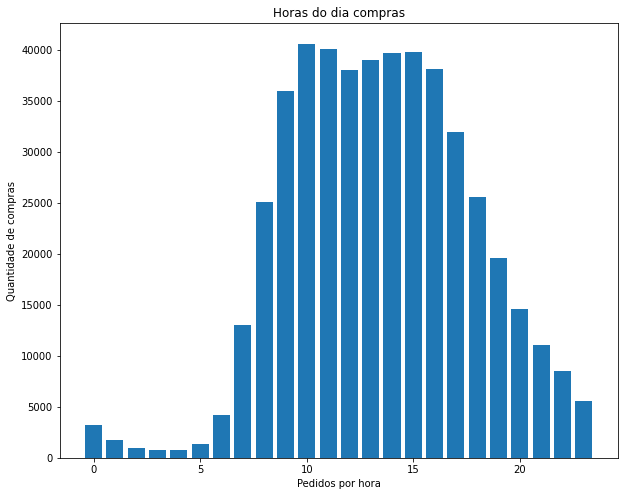

In [46]:
plot_data = df_instacart_orders.groupby('order_hour_of_day').user_id.count()

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(plot_data.index, plot_data.values)
ax.set_title('Horas do dia compras')
ax.set_xlabel('Pedidos por hora')
ax.set_ylabel('Quantidade de compras')

Escreva suas conclusões aqui

No gráfico de barras acima, o pico de compras ocorre entre 10 e 11 horas da manhã. A quanntidade de compras feito nesse período é mais de 40000.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito, boa escolha de visualização!
</div>



### [A3] Em que dia da semana as pessoas fazem compras?

Text(0, 0.5, 'Quantidade de compras')

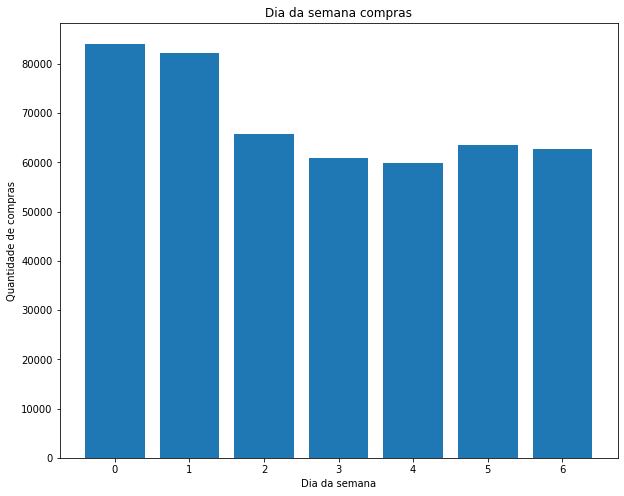

In [47]:
plot_data = df_instacart_orders.groupby('order_dow').user_id.count()

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(plot_data.index, plot_data.values)
ax.set_title('Dia da semana compras')
ax.set_xlabel('Dia da semana')
ax.set_ylabel('Quantidade de compras')

Escreva suas conclusões aqui

Os dias nos quais as pessoas mais fazem compras são domingo, segunda-feira. No domingo são mais de 80000 compras, na segunda-feira são um pouco menos do que domingo.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito mais uma vez!
</div>



### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Text(0, 0.5, 'Quantidade de pedidos')

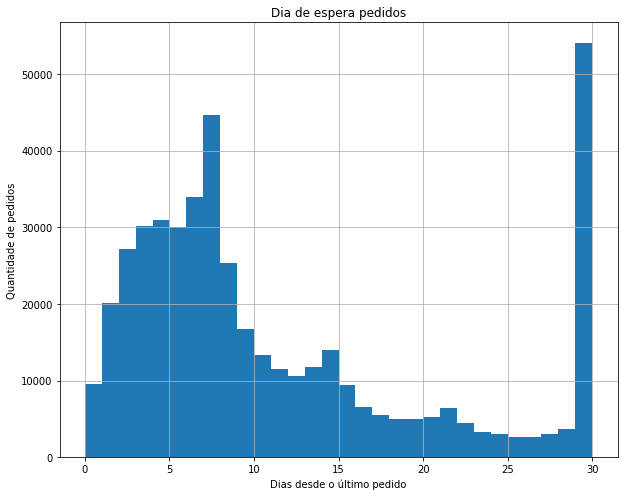

In [48]:
plot_data = df_instacart_orders.groupby('days_since_prior_order').user_id.count() 

fig, ax = plt.subplots(figsize=(10, 8))
df_instacart_orders.hist(column='days_since_prior_order', 
                         bins=30, 
                         ax=ax)
plt.title('Dia de espera pedidos')
plt.xlabel('Dias desde o último pedido') 
plt.ylabel('Quantidade de pedidos')

Escreva suas conclusões aqui

O pico de dias de espera são uma semana (7 dias). O mínimo é no dia 26 com menos de 10000 pedidos e o máximo é dia 30 com mais de 50000 pedidos.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Correto o desenvolvimento, a é importante interpretar o que a visualização está nos trazendo!

</div>



<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Como posso explicar o pico no dia 30? Para mim parecer ser um insight ou até mesmo um outlier.
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Uma possibilidade seriam serviços de assinatura mensal.
</div>

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa histogramas para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie histogramas para ambos os dias e descreva as diferenças.

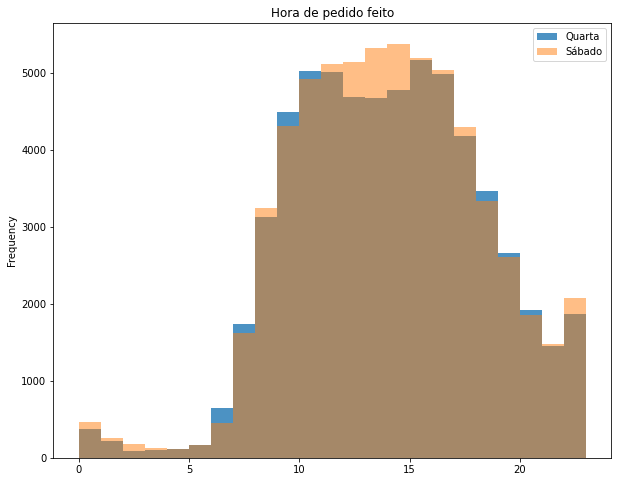

In [49]:
plot_data_quarta = df_instacart_orders[(df_instacart_orders['order_dow'] == 3)]
plot_data_sabado = df_instacart_orders[(df_instacart_orders['order_dow'] == 6)]

fig, ax = plt.subplots(figsize=(10, 8))
plot_data_quarta['order_hour_of_day'].plot(kind='hist', 
                                           bins=23, 
                                           title='Quantiodade de pedidos', 
                                           xlabel='Hora do dia',
                                           ylabel='Quantidade de pedidos', 
                                           alpha=0.8, 
                                           ax=ax)

plot_data_sabado['order_hour_of_day'].plot(kind='hist', 
                                           bins=23, 
                                           title='Hora de pedido feito', 
                                           xlabel='Hora do dia',
                                           ylabel='Quantidade de pedidos', 
                                           alpha=0.5, 
                                           ax=ax)

plt.legend(['Quarta', 'Sábado'])
plt.show()

Escreva suas conclusões aqui

Há uma diferença mínima entre quarta-feira e sábado na hora de fazer o pedido. Nas quartas-feiras há mais pedidos feitos entre 5 às 7 da manhã e das 9 às 10 da manhã; e das 18 às 20 da noite.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>
Gostei da ideia da vizualização mas da forma que está pode estar escondendo informações importantes sob a cor laranja.

Sugiro que adicione transparência (alpha) nos parâmetros para que a leitura seja facilitada.
</div>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Ótimo!
</div>

### [B2] Qual é a distribuição do número de pedidos por cliente?

Text(0, 0.5, 'Quantidade de clientes')

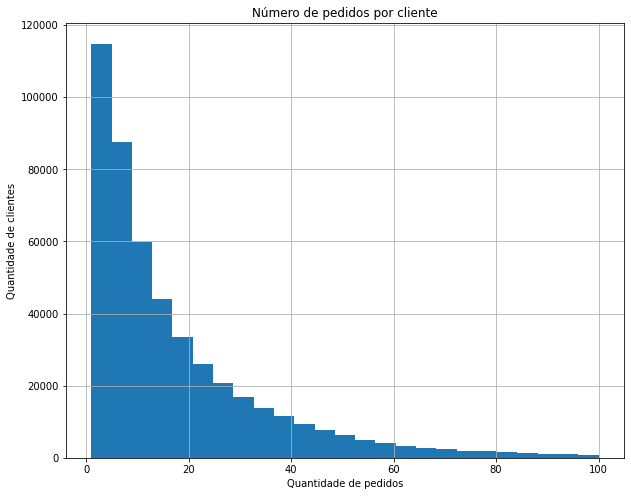

In [50]:
plot_data = df_instacart_orders.groupby('user_id').order_number.count().reset_index()

fig, ax = plt.subplots(figsize=(10, 8))
df_instacart_orders.hist(column='order_number', 
                         bins=25, 
                         ax=ax)
plt.title('Número de pedidos por cliente')
plt.xlabel('Quantidade de pedidos')
plt.ylabel('Quantidade de clientes')

Escreva suas conclusões aqui

A dispersão tem assimetria positiva, foi observado que há muitos clientes com poucos pedidos, conforme o número de pedidos for aumentando o número de clientes diminui.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito o trabalho aqui!
</div>



### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [51]:
products_pop = df_order_products.groupby('product_id').order_id.count().sort_values(ascending=False).rename('sold_quantity').head(20).reset_index()
product_dict = df_products[['product_id', 'product_name']].drop_duplicates()
products_merged = product_dict.merge(products_pop, how='inner', on='product_id')

products_merged.sort_values(by='sold_quantity', ascending=False)

,product_id,product_name,sold_quantity
7,24852,banana,66050
2,13176,bag of organic bananas,53297
4,21137,organic strawberries,37039
5,21903,organic baby spinach,33971
16,47209,organic hass avocado,29773
18,47766,organic avocado,24689
17,47626,large lemon,21495
3,16797,strawberries,20018
9,26209,limes,19690
10,27845,organic whole milk,19600


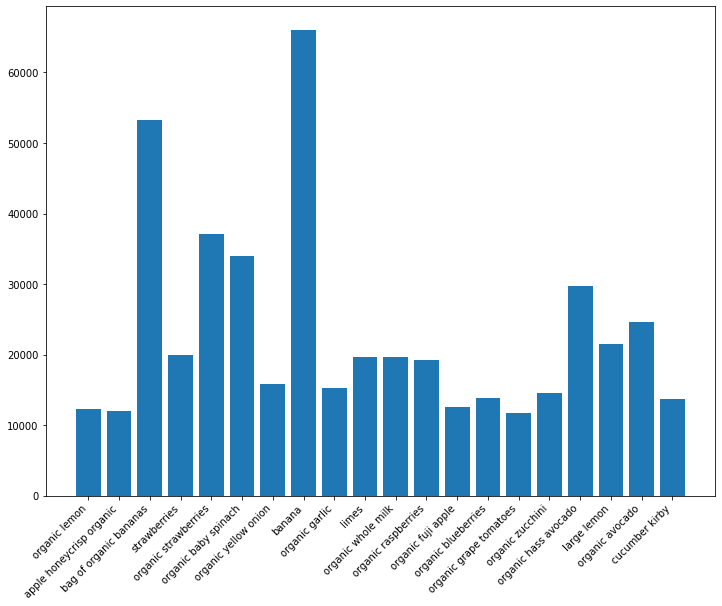

In [52]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.bar(products_merged.product_name, products_merged.sold_quantity)
plt.xticks(rotation=45, ha='right');

Escreva suas conclusões aqui

Os 20 produtos mais populares são frutas, um tipo de leite e legumes.

<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Podemos melhorar um pouco por aqui. Embora não esteja explícito faz sentido ordernarmos do primeiro ao vigésimo mais vendido, concorda?

Vamos trabalhar essa ordenação? Sugiro incuir um gráfico para ficar ainda melhor.

</div>



<div class="alert alert-info">
<strong>Comentário do estudante</strong>

A função `sort_values(by='sold_quantity', ascending=False)` faz a ordenção, certo?
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Ok!
</div>

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

Text(0, 0.5, 'Quantidade de pedidos em milhões')

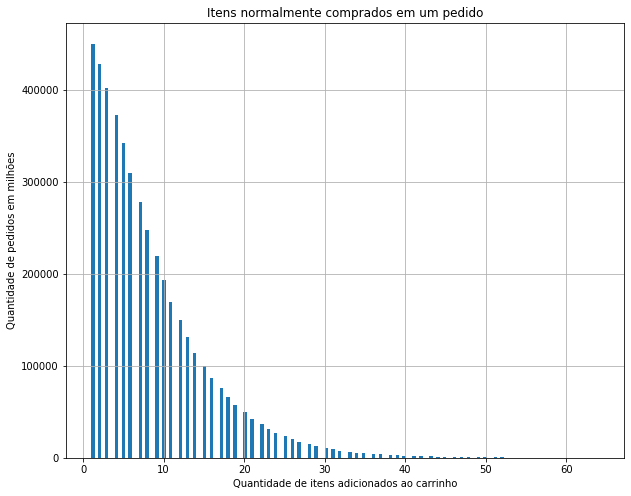

In [53]:
plot_data_order = df_order_products.groupby('add_to_cart_order').reordered.count()

fig, ax = plt.subplots(figsize=(10, 8))
df_order_products.hist(column='add_to_cart_order', 
                       bins=150, 
                       ax=ax)
plt.title('Itens normalmente comprados em um pedido')
plt.xlabel('Quantidade de itens adicionados ao carrinho') 
plt.ylabel('Quantidade de pedidos em milhões')

Escreva suas conclusões aqui

A distribuição tem assimetria positiva, foi observado que há muitos pedidos com poucos itens, conforme o número de pedidos for aumentando o número de itens diminui.

<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>
Aqui pode ser interessante incluir mais bins para que mais detalhes fiquem evidentes.
</div>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Muito bom!
</div>

### [C2] Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

In [54]:
order_details = pd.merge(df_order_products, df_products, on='product_id')
reordered_products = order_details[order_details['reordered'] == 1]
product_reorder_counts = reordered_products[['product_name', 'product_id']].value_counts().reset_index()
product_reorder_counts.columns = ['product_name', 'product_id', 'reorder_count']
top_20_reorder_products = product_reorder_counts.head(20)


top_20_reorder_products

,product_name,product_id,reorder_count
0,banana,24852,55763
1,bag of organic bananas,13176,44450
2,organic strawberries,21137,28639
3,organic baby spinach,21903,26233
4,organic hass avocado,47209,23629
5,organic avocado,47766,18743
6,organic whole milk,27845,16251
7,large lemon,47626,15044
8,organic raspberries,27966,14748
9,strawberries,16797,13945


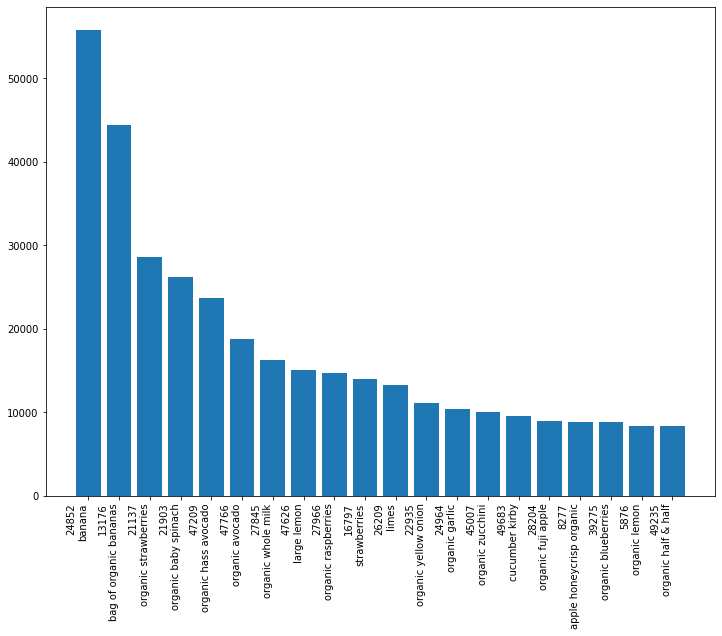

In [55]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.bar(top_20_reorder_products.product_id.astype(str) + '\n' + 
       top_20_reorder_products.product_name, 
       top_20_reorder_products.reorder_count)
plt.xticks(rotation=90, ha='right');

Escreva suas conclusões aqui

Foi observado que a maioria dos itens mais frequentes são frutas, legumes e um tipo de leite.

<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

O resultado está correto!

Mais uma vez acho que um gráfico agregaria muito bem por aqui!
</div>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Muito bom!
</div>

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [56]:
order_details = pd.merge(df_instacart_orders, df_order_products, on='order_id')
order_details['reordered'] = order_details['reordered'].fillna(0).astype(int)
total_orders_by_product = order_details.groupby('product_id')['order_id'].nunique()
reordered_orders_by_product = order_details[order_details['reordered'] == 1].groupby('product_id')['order_id'].nunique()
reorder_ratio_by_product = (reordered_orders_by_product / total_orders_by_product).fillna(0)
result_df = pd.DataFrame({'product_id': reorder_ratio_by_product.index, 'reorder_ratio': reorder_ratio_by_product.values})

cols = ['product_id', 'product_name', 'reorder_ratio']
result_df.join(df_products.set_index('product_id').product_name, on='product_id')[cols]

,product_id,product_name,reorder_ratio
0,1,chocolate sandwich cookies,0.562724
1,2,all-seasons salt,0.000000
2,3,robust golden unsweetened oolong tea,0.738095
3,4,smart ones classic favorites mini rigatoni wit...,0.510204
4,7,pure coconut water with orange,0.500000
...,...,...,...
45567,49690,high performance energy drink,0.800000
45568,49691,original pancake & waffle mix,0.430556
45569,49692,organic instant oatmeal light maple brown sugar,0.416667
45570,49693,spring water body wash,0.440000


Escreva suas conclusões aqui

A parcela de ser um pedido repetido varia de produto em produto. 

<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Aqui valeria a pena trazer o nome do produto para completar a análise, mas o resultado está correto!
</div>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Excelente!
</div>

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [57]:
order_details = pd.merge(df_order_products, df_instacart_orders, on='order_id')
order_details['reordered'] = order_details['reordered'].fillna(0).astype(int)
reordered_orders_by_customer = order_details.groupby('user_id')['reordered'].mean()
df_result = pd.DataFrame({'user_id': reordered_orders_by_customer.index, 'reorder_ratio': reordered_orders_by_customer.values})

df_result

,user_id,reorder_ratio
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.928571
...,...,...
149618,206203,0.222222
149619,206206,0.714286
149620,206207,0.891304
149621,206208,0.696000


Escreva suas conclusões aqui

A proporção de ser um pedido repetido varia de cliente em cliente. 

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

O resultado aqui está errado.

A maneira mais simples de resolver essa seria um merge entr order_product e orders seguida de um agrupamento por user ID tirando a média da variável reorder
</div>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Agora sim, muito bom!
</div>

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [58]:
order_merge = pd.merge(df_products, df_order_products, on='product_id')
reordered_prod = order_merge[order_merge['add_to_cart_order'] == 1]
product_counts = reordered_prod['product_name'].value_counts().reset_index()
product_counts.columns = ['product_name', 'reorder_count']
most_add = product_counts.head(20)

most_add

,product_name,reorder_count
0,banana,15562
1,bag of organic bananas,11026
2,organic whole milk,4363
3,organic strawberries,3946
4,organic hass avocado,3390
5,organic baby spinach,3336
6,organic avocado,3044
7,spring water,2336
8,strawberries,2308
9,organic raspberries,2024


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Essa sessão não foi concluída pois é complexo entender o resultado a partir do seu output. Seria importante tratar essa saída para deixar clara a resposta da questão.
</div>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Obrigado pelo ajuste! Está perfeito agora.
</div>

Escreva suas conclusões aqui

Os itens que os clientes colocam em seus carrinhos antes de todos os outros é a banana, banana orgânica, leite, morango orgânico, abacate hass orgânico, água com gás, morango, framboesa orgânica, água com gás sabor toranja, meio a meio (uma mistura composta por metade creme de leite (com 35% de gordura) e metade leite integral) orgânico, limão, refrigerante, leite orgânico com baixo teor de gordura, lima, abacate hass, leite orgânico com baixo teor de gordura (2%), meio a meio (uma mistura composta por metade creme de leite (com 35% de gordura) e metade leite integral) e por fim cebola amarela orgânica.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados acima nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Trabalho muito sólido com o projeto! Gostei muito.
    
    
Parabéns pela aprovação e até breve!
</div>

